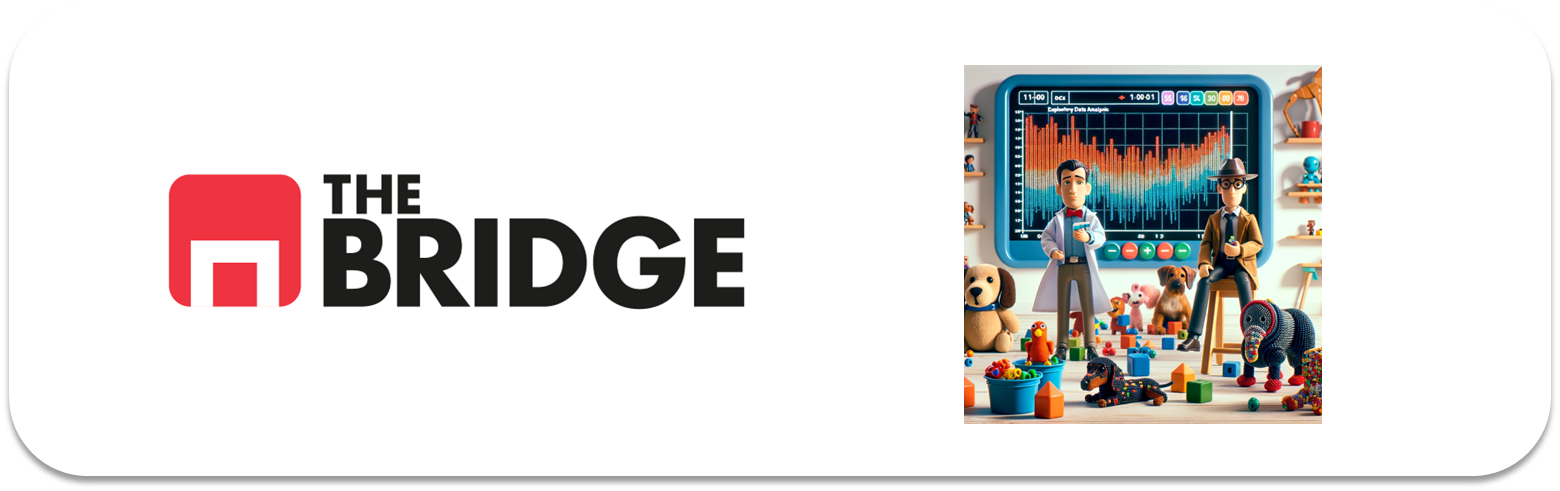

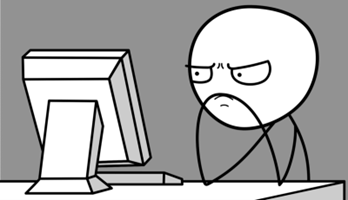

Para ejercitarte y afianzar lo aprendido sobre análisis multivariante, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot


In [2]:
from scipy.stats import pearsonr

from scipy import stats

### Ejercicio 1

Carga el dataset de admisiones que conoces de la unidad anterior y que se encuentra en la ruta "./data/admission_data.csv", deshazte de las columnas innecesarias

In [3]:
df_admission = pd.read_csv("./data/admission_data.csv")
df_admission.head()

,Unnamed: 0,Year,Major,Gender,Admission
0,0,1973,School of Medicine,F,Rejected
1,1,1973,Department of Economics,M,Accepted
2,2,1973,Other,F,Accepted
3,3,1973,Other,M,Accepted
4,4,1973,Other,M,Rejected


In [4]:
df_admission = df_admission.set_index("Unnamed: 0")
df_admission.head()

,Year,Major,Gender,Admission
Unnamed: 0,,,,
0,1973,School of Medicine,F,Rejected
1,1973,Department of Economics,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected


In [5]:
variables_categoricas = [
    "Major",
    "Gender",
    "Admission"
]

### Ejercicio 2

Realiza los análisis multivariante que consideres necesarios para contestar apoyándote en los datos a las preguntas: ¿Existe algún departamenteo específico donde pudieramos hablar de discriminación?¿Están estos resultados en consonancia con lo obtenido en el análisis bivariante de admisiones y género? 

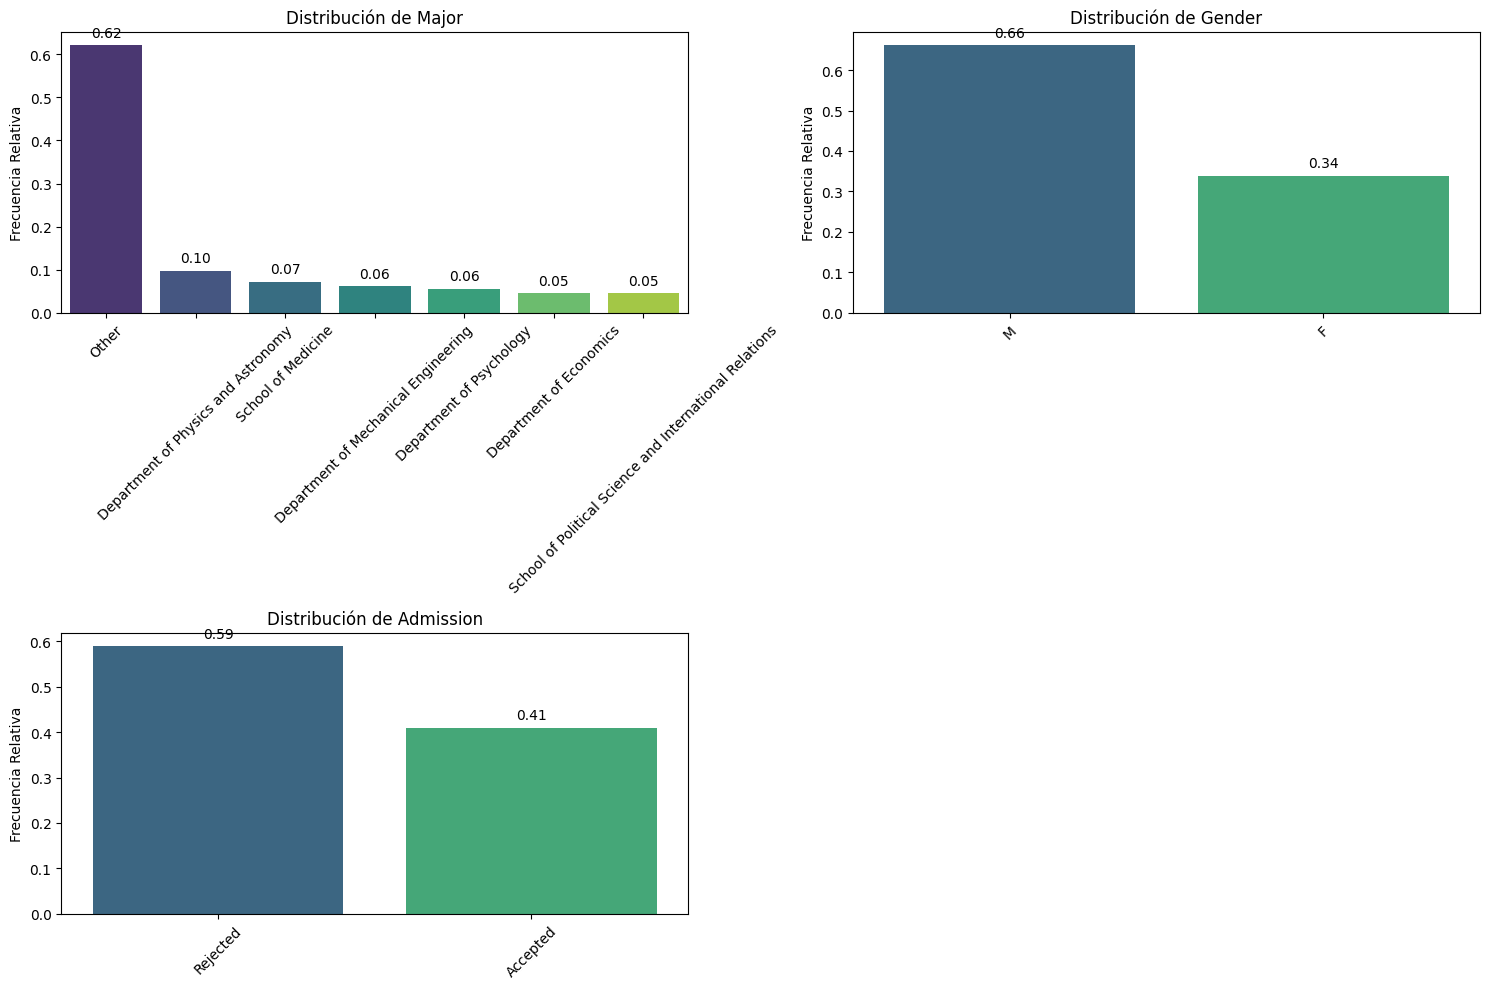

In [6]:
pinta_distribucion_categoricas(df_admission, variables_categoricas, relativa= True, mostrar_valores= True)

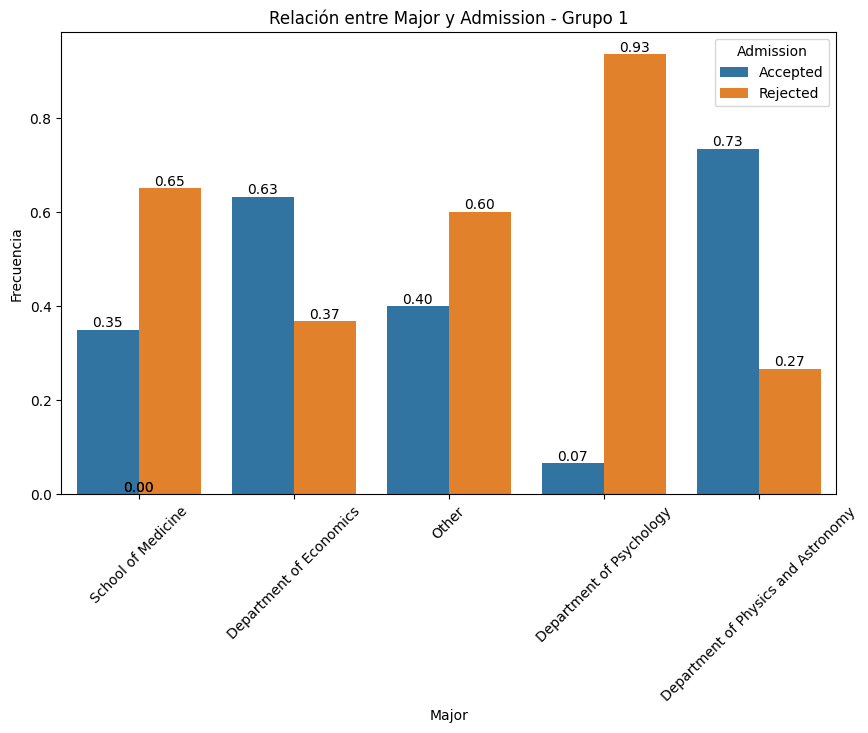

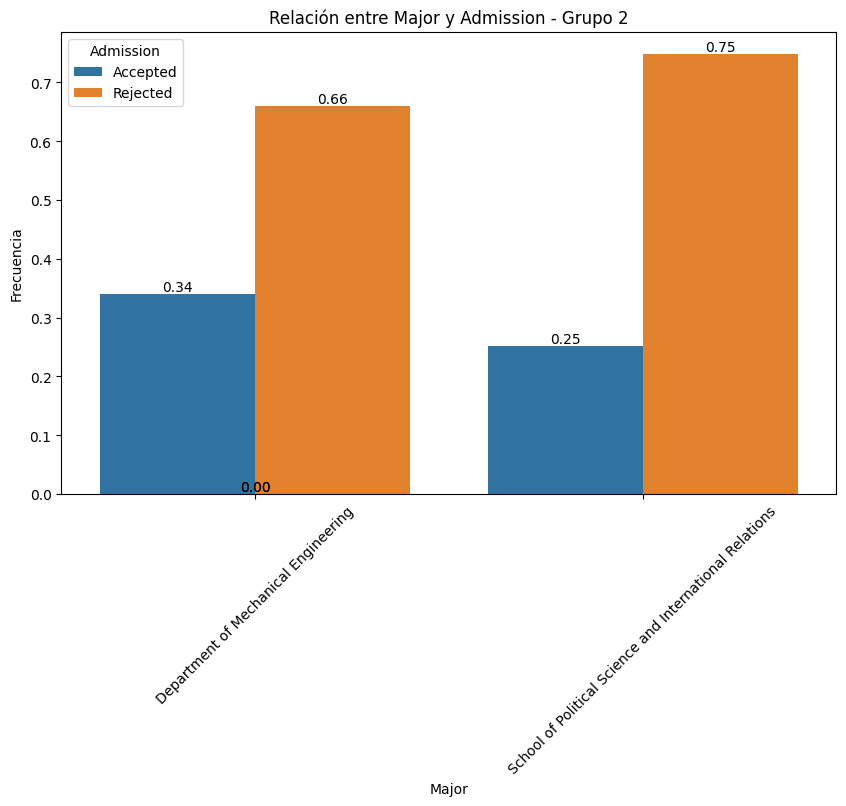

In [7]:
plot_categorical_relationship_fin(df_admission,"Major","Admission", relative_freq= True, show_values= True)

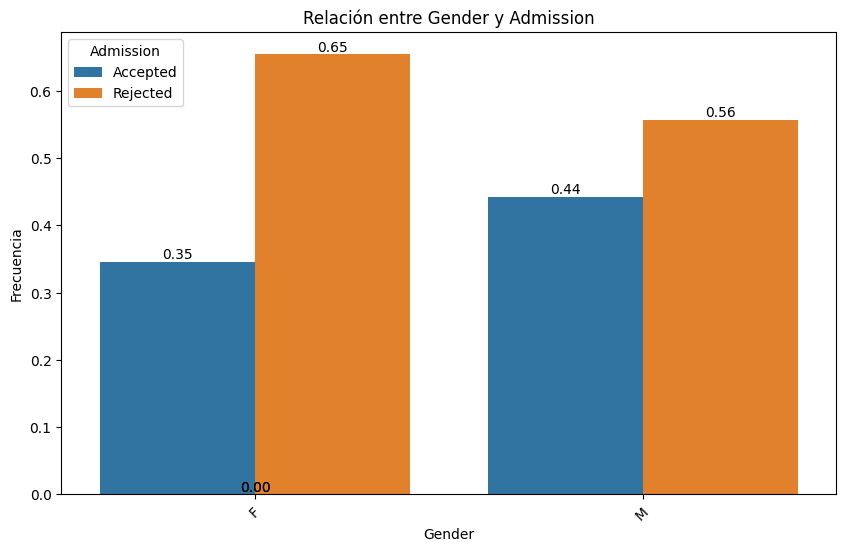

In [8]:
plot_categorical_relationship_fin(df_admission,"Gender","Admission", relative_freq= True, show_values= True)

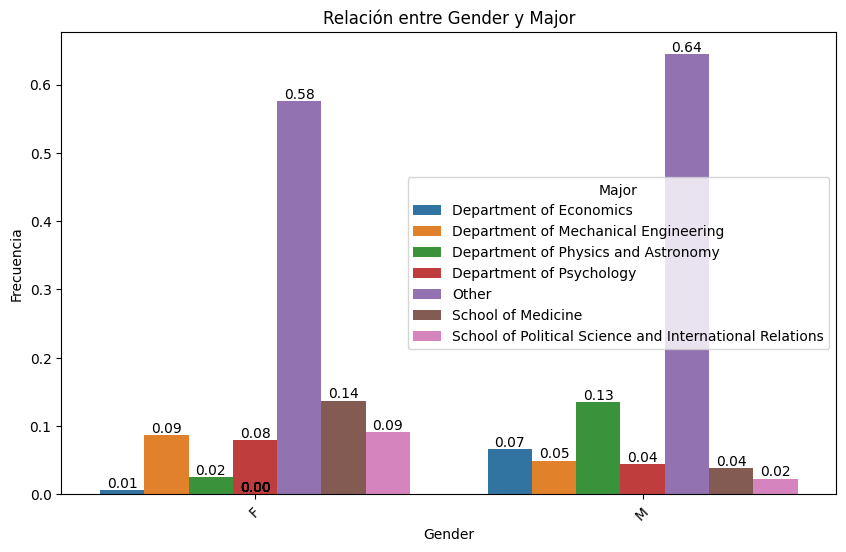

In [9]:
plot_categorical_relationship_fin(df_admission,"Gender","Major", relative_freq= True, show_values= True)

In [10]:
tabla_contingencia = pd.crosstab(df_admission['Major'], df_admission['Admission'], normalize=True)

tabla_contingencia

Admission,Accepted,Rejected
Major,,
Department of Economics,0.028990,0.016846
Department of Mechanical Engineering,0.021077,0.040978
Department of Physics and Astronomy,0.071613,0.026013
Department of Psychology,0.003683,0.052260
Other,0.247904,0.372953
School of Medicine,0.025151,0.046776
School of Political Science and International Relations,0.011518,0.034240


In [82]:
columnas = ["Admission","Gender","Major"] 
col_directora = "Major"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_admission[col_directora].unique():
    diccionario_multivariante[valor] = df_admission.loc[df_admission[col_directora] == valor,[col_2,col_1]]

Respuesta School of Medicine:


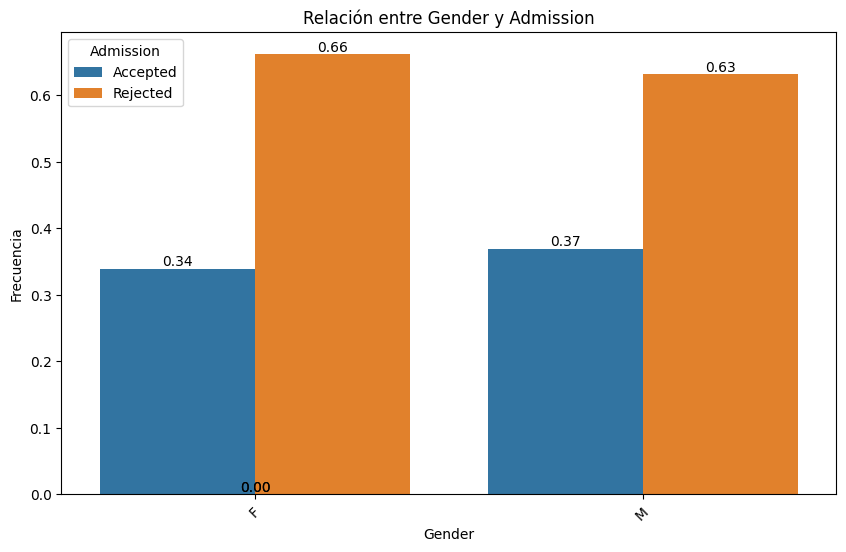

Respuesta Department of Economics:


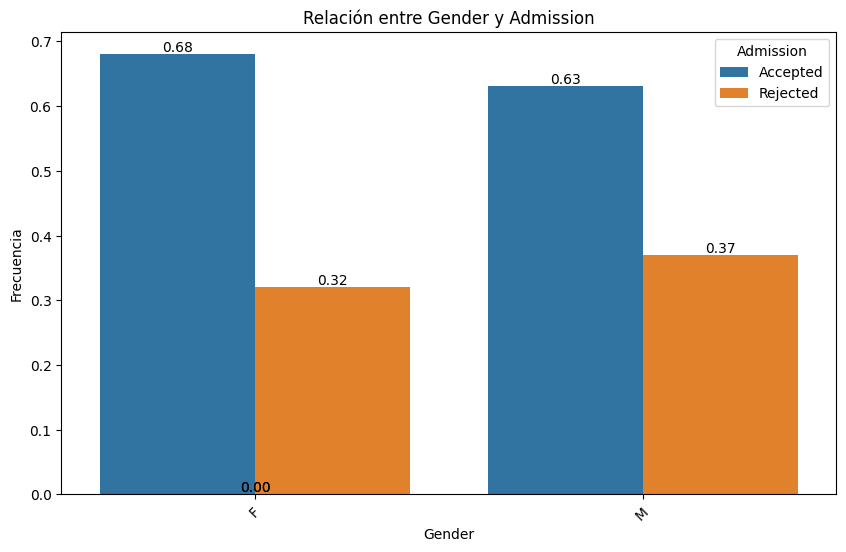

Respuesta Other:


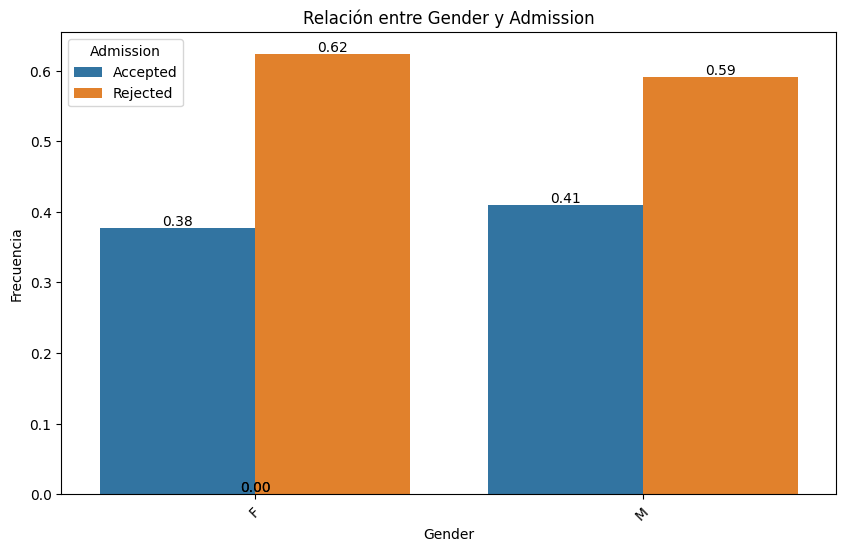

Respuesta Department of Psychology:


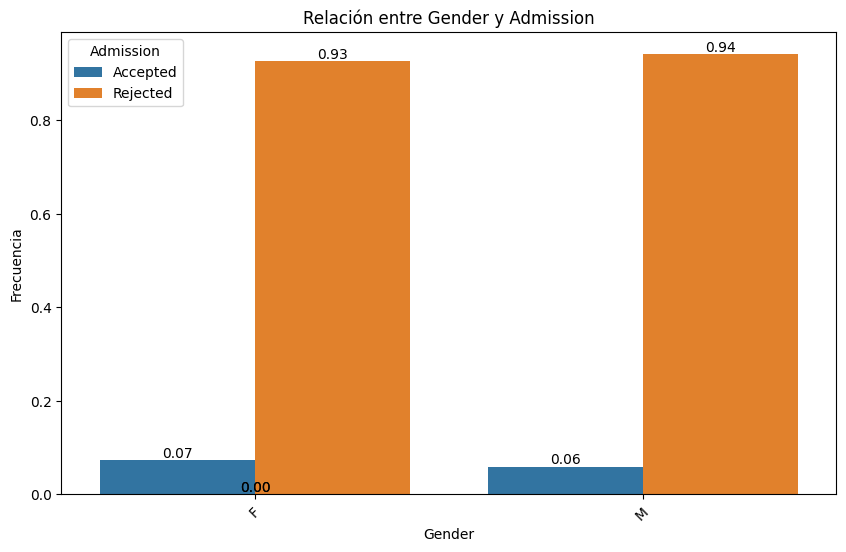

Respuesta Department of Physics and Astronomy:


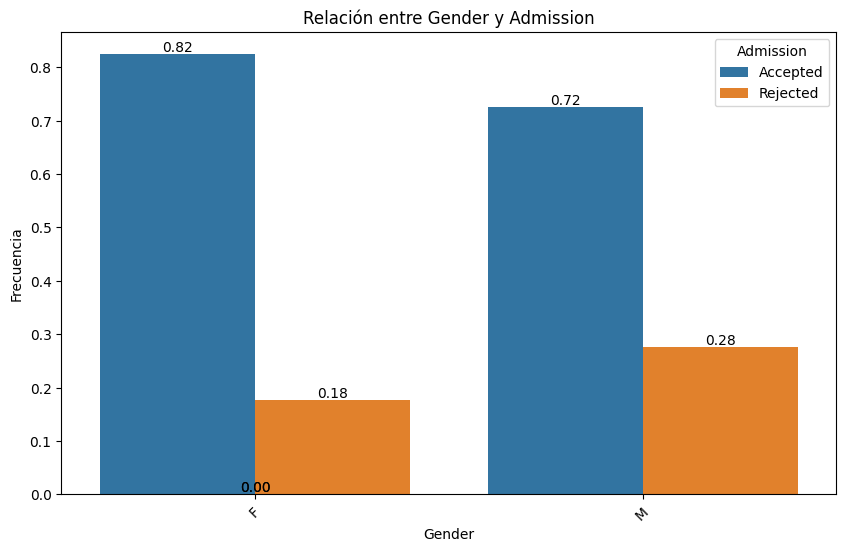

Respuesta Department of Mechanical Engineering:


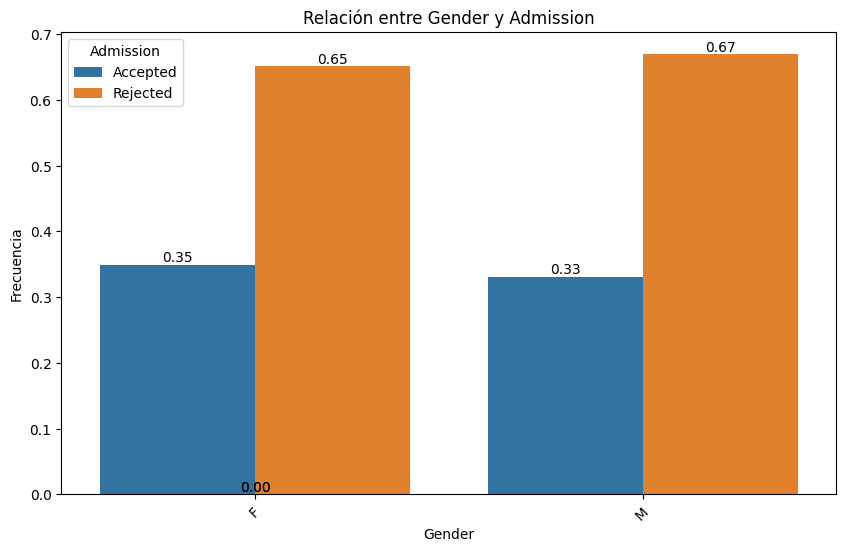

Respuesta School of Political Science and International Relations:


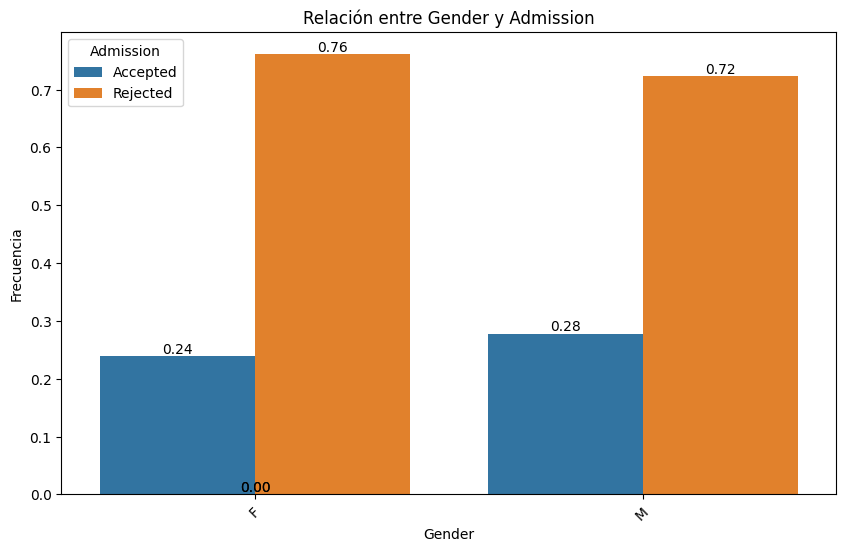

In [ ]:
# Celda eliminada - análisis completado arriba

In [13]:
# Casi todos los departamentos tienen casi el porcentaje de admision y rechazo para ambos M y F.
# Aunque en algunos departamentos hay una ligera diferencia, no es significativa.

### Ejercicio 3

Carga el dataset de propinas (tips) que conoces de la unidad anterior y que se encuentra en la ruta "./data/tips.csv", deshazte de las columnas innecesarias

In [18]:
df_tips = pd.read_csv("./data/tips.csv")
df_tips.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [19]:
df_tips = df_tips.set_index("Unnamed: 0")
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
Unnamed: 0,,,,,,,
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


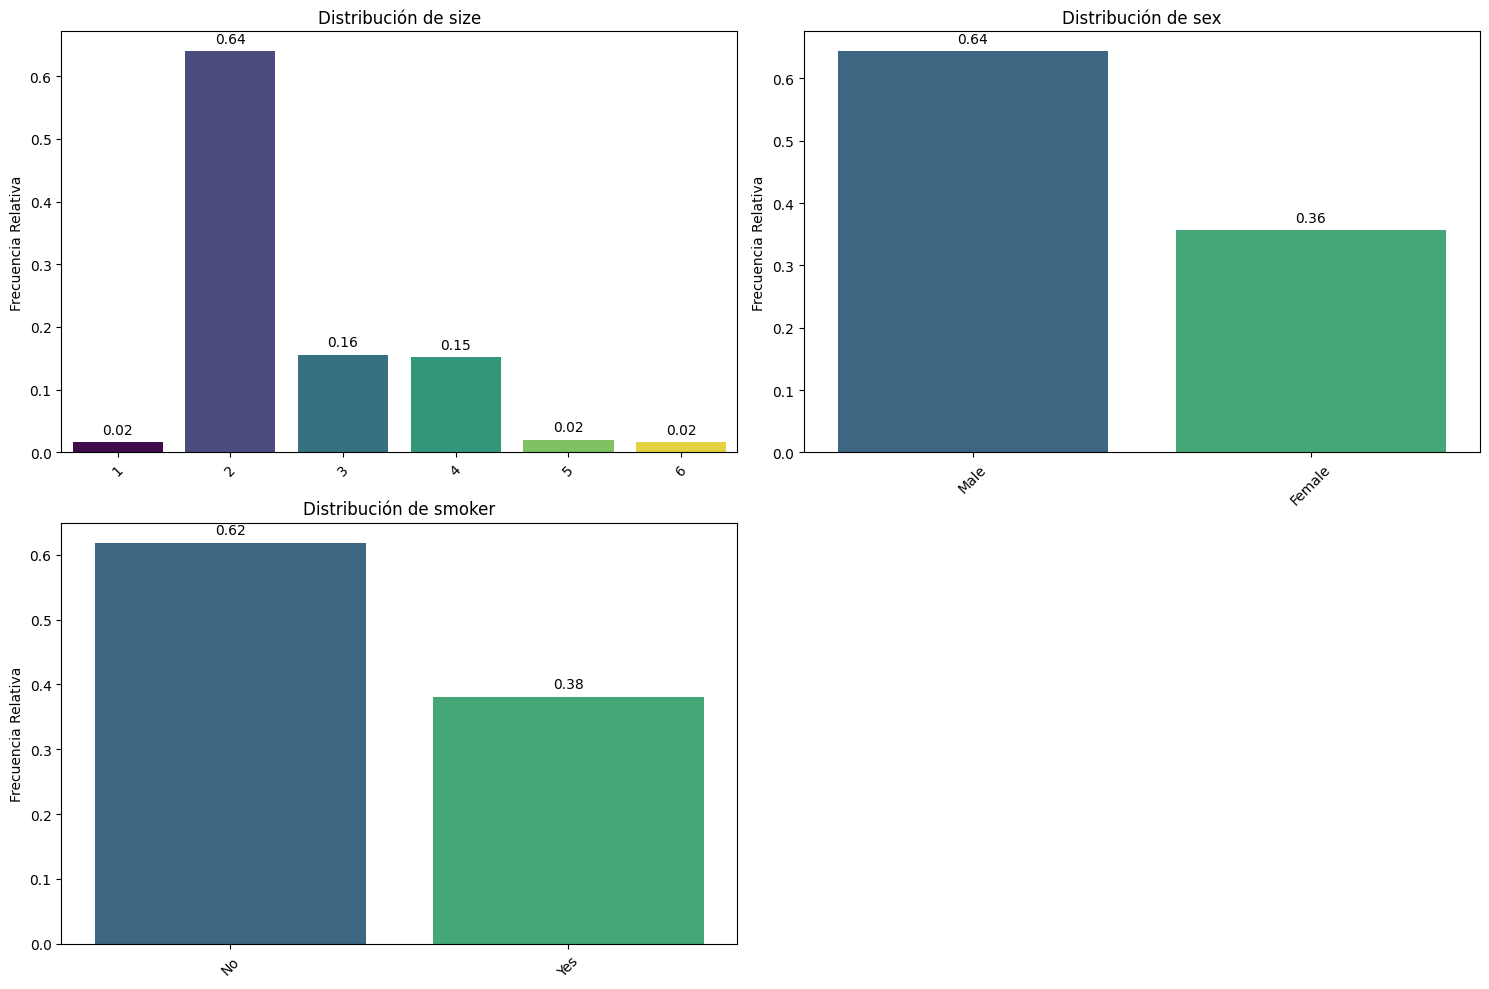

In [64]:
pinta_distribucion_categoricas(df_tips,["size","sex","smoker"], relativa= True, mostrar_valores= True)

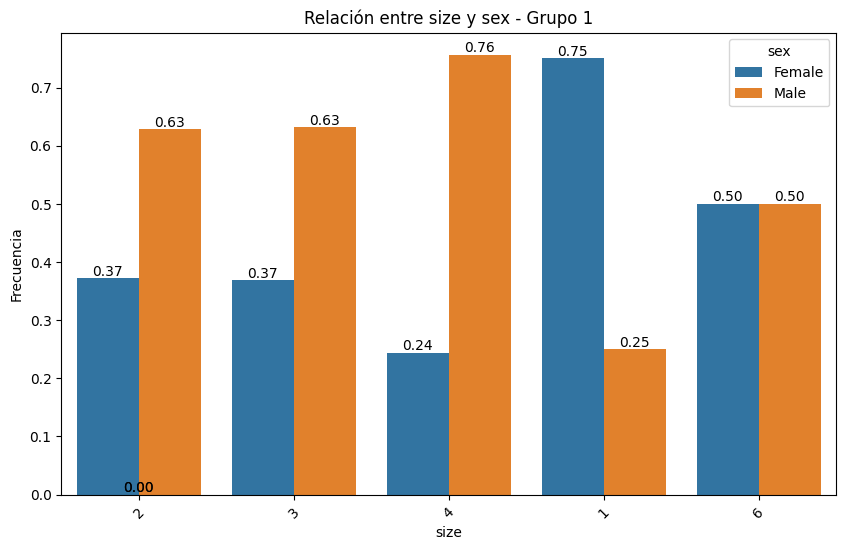

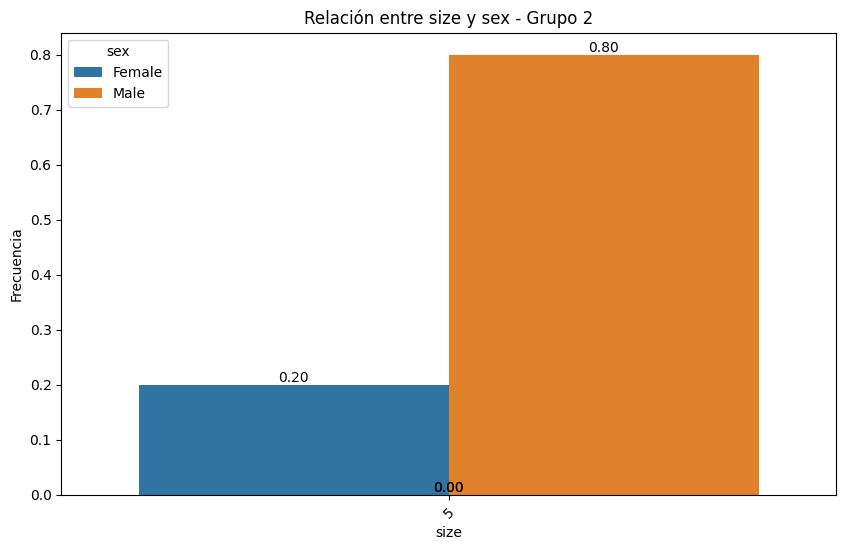

In [65]:
plot_categorical_relationship_fin(df_tips,"size","sex", relative_freq= True, show_values= True)

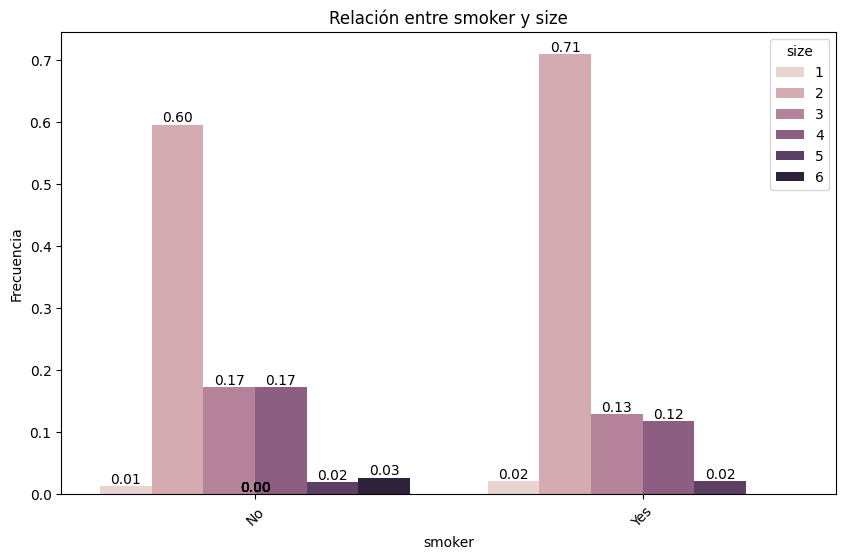

In [66]:
plot_categorical_relationship_fin(df_tips,"smoker","size", relative_freq= True, show_values= True)

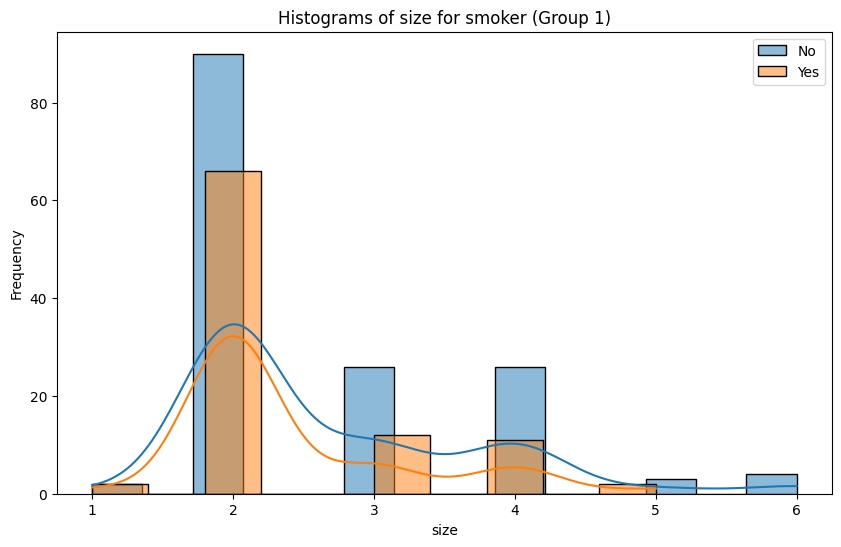

In [93]:
plot_grouped_histograms(df_tips,"smoker", "size", 5)

In [94]:
tabla_contingencia = pd.crosstab(df_tips['smoker'], df_tips['size'])

tabla_contingencia


size,1,2,3,4,5,6
smoker,,,,,,
No,2,90,26,26,3,4
Yes,2,66,12,11,2,0


In [95]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 5.664460853541009
P-Value: 0.34024887997389514
Grados de Libertad: 5
Tabla de Frecuencias Esperadas:
 [[ 2.47540984 96.54098361 23.51639344 22.89754098  3.0942623   2.47540984]
 [ 1.52459016 59.45901639 14.48360656 14.10245902  1.9057377   1.52459016]]


In [ ]:
# El P-Value es muy alto (0.35) - muy por encima de 0.05
# Por lo que significa que no hay una correlacion significativa entre "smoker" y "size"
# Habia una pequeña diferencia antes y quería simplemente verificar si era significativa o no

In [ ]:
# Por 'sex'
col_directora = "sex"
col_1 = "tip"
col_2 = "total_bill"
diccionario_multivariante = {}
for valor in df_tips[col_directora].unique():
    diccionario_multivariante[valor] = df_tips.loc[df_tips[col_directora] == valor,[col_2,col_1]]

Respuesta 2:


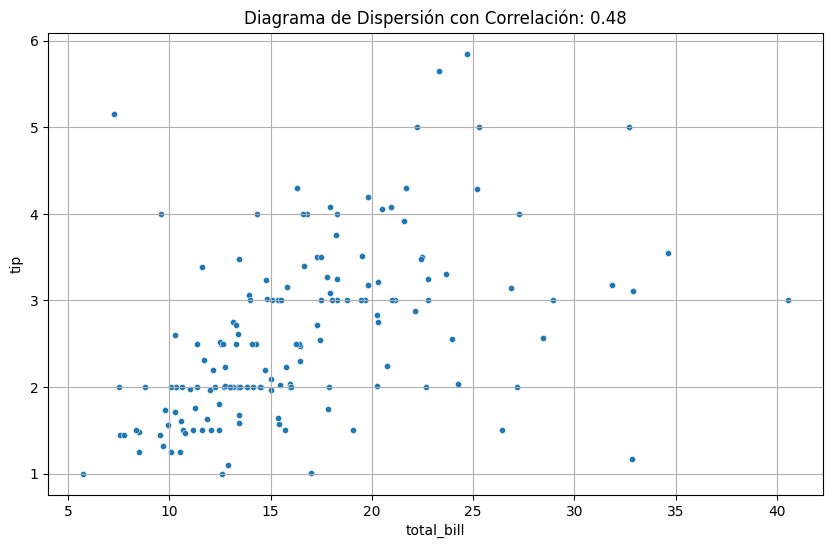

Respuesta 3:


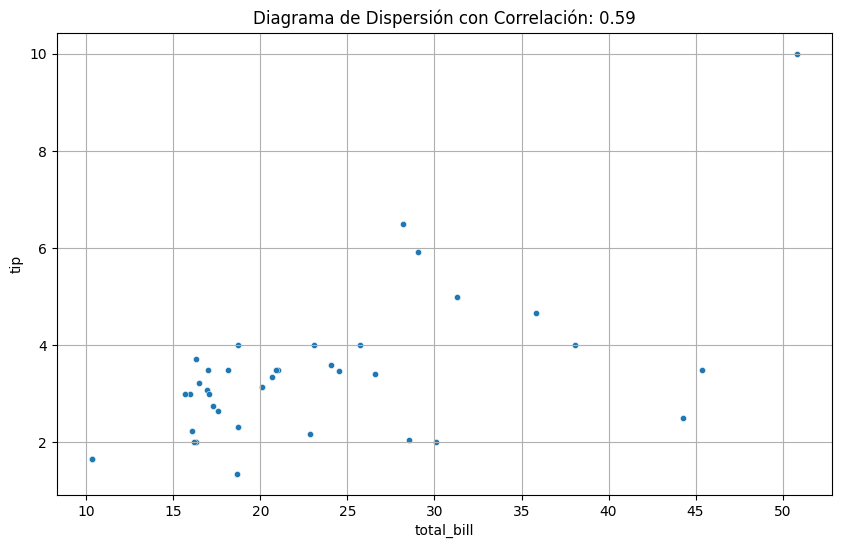

Respuesta 4:


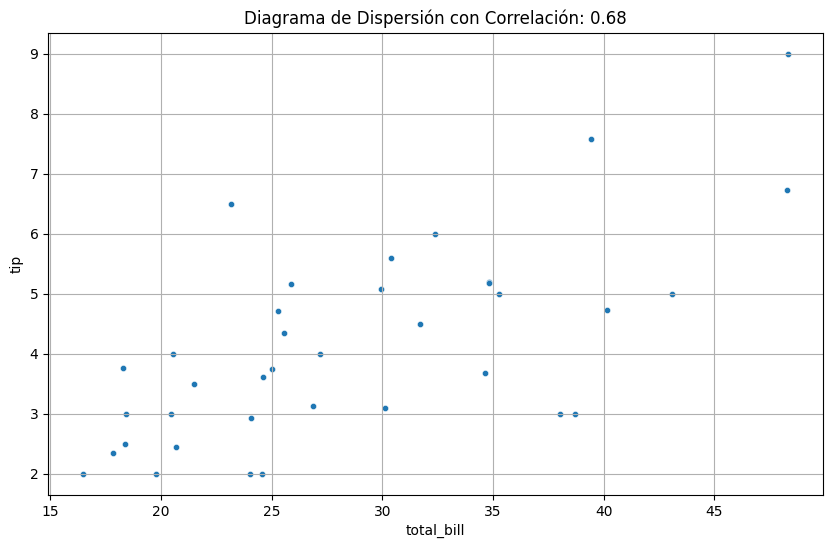

Respuesta 1:


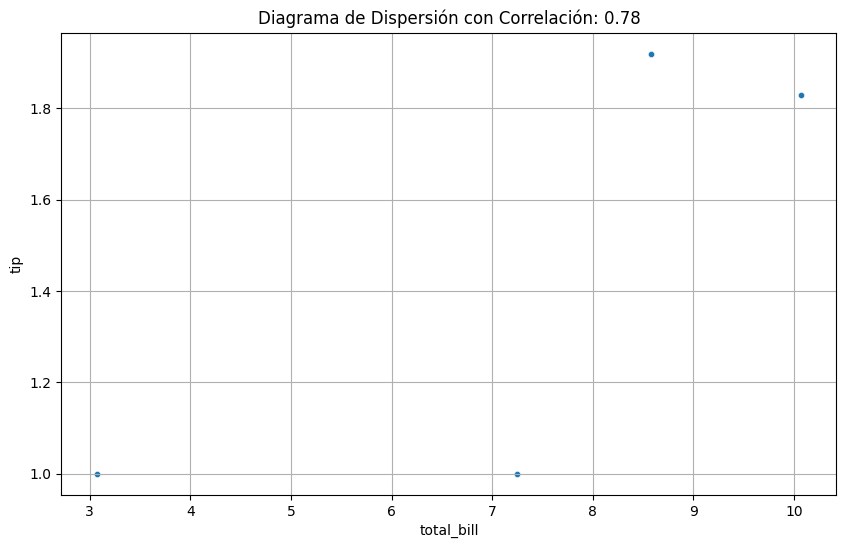

Respuesta 6:


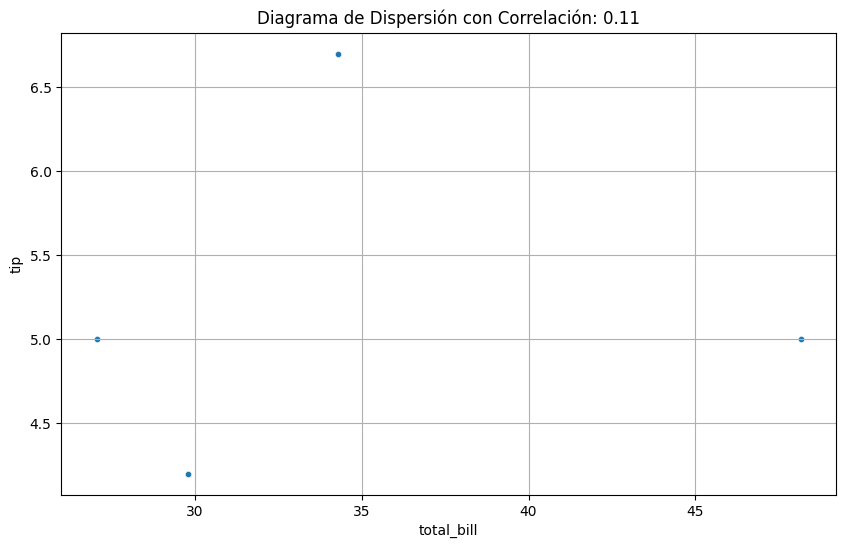

Respuesta 5:


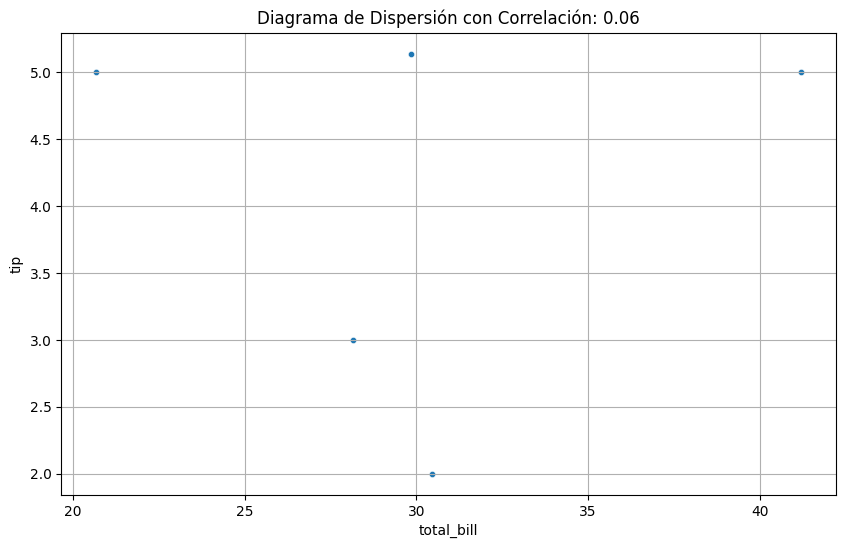

In [91]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

In [ ]:
# por size
col_directora = "size"
col_1 = "tip"
col_2 = "total_bill"
diccionario_multivariante = {}
for valor in df_tips[col_directora].unique():
    diccionario_multivariante[valor] = df_tips.loc[df_tips[col_directora] == valor,[col_2,col_1]]

Size 2:


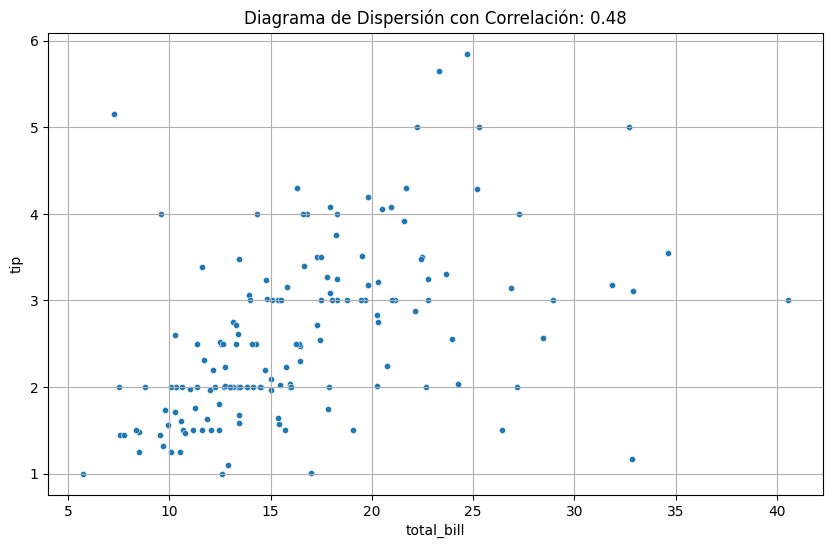

Size 3:


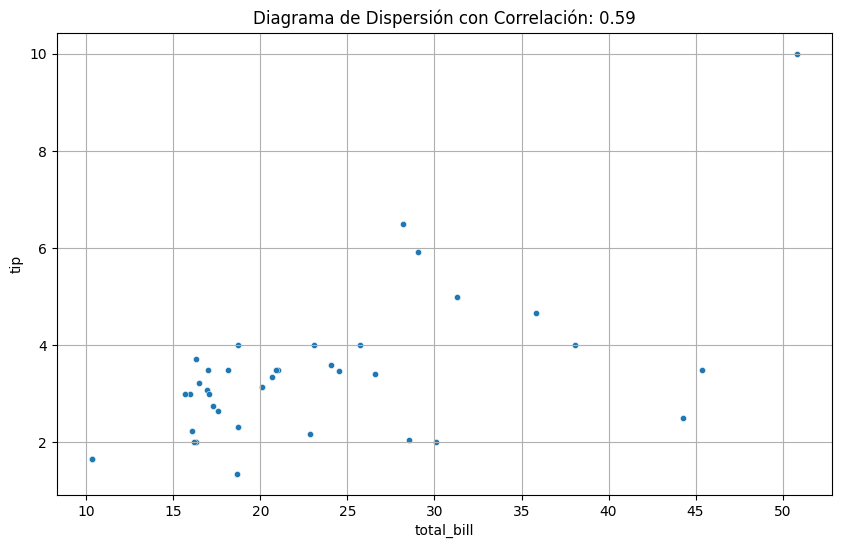

Size 4:


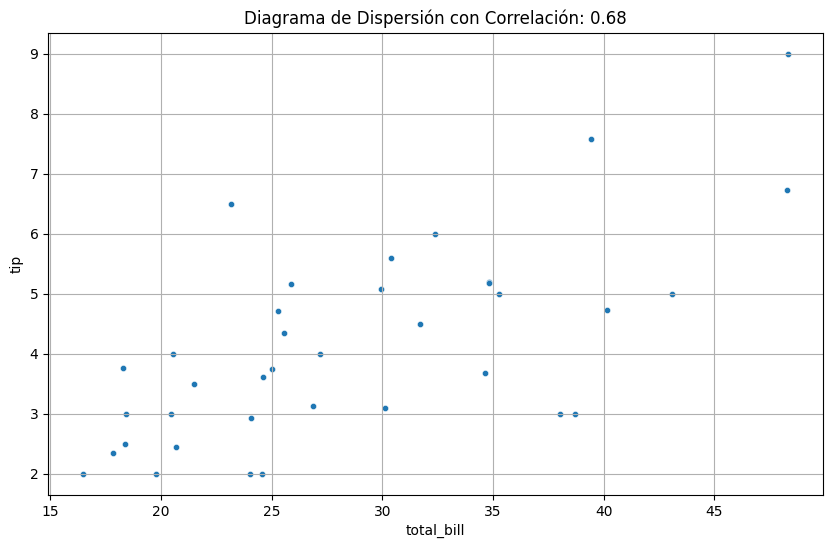

Size 1:


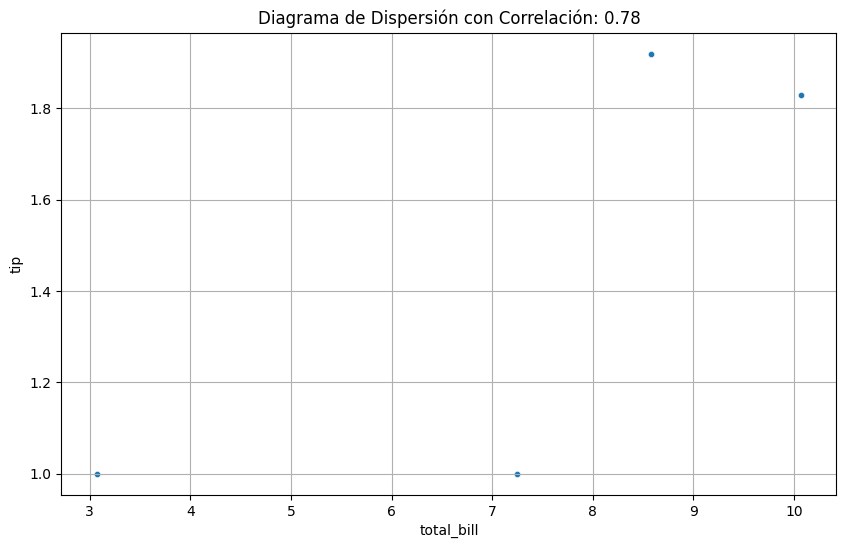

Size 6:


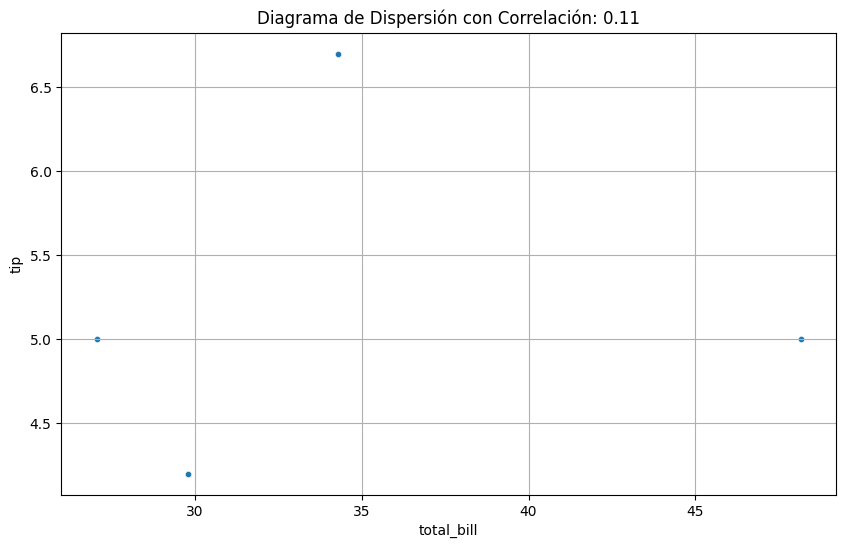

Size 5:


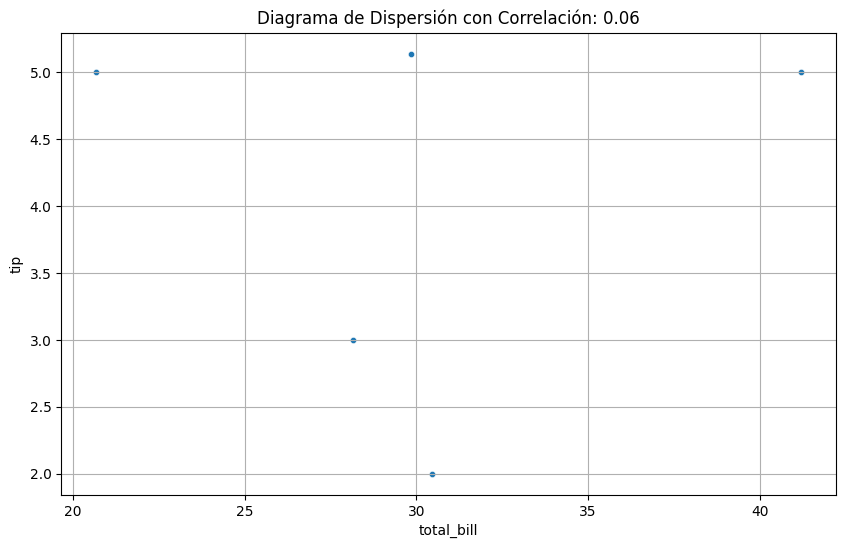

In [ ]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Size {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

In [ ]:
# La relación entre la cuenta y la propina no es la misma para todos los grupos. Depende del sexo y del tamaño de la mesa.
# Las relaciones cambian significativamente según el grupo considerado.

### Ejercicio 4

Carga el dataset de accidentes que conoces de la unidad anterior y que se encuentra en la ruta "./data/car_crashes.csv", deshazte de las columnas innecesarias y renombra la que contiene las iniciales de los estados a "state"

In [21]:
df_car = pd.read_csv("./data/car_crashes.csv", sep = "|")
df_car.head()

,Unnamed: 0,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [24]:
df_car.set_index("Unnamed: 0")

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
Unnamed: 0,,,,,,,,
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC


### Ejercicio 5

Realiza una análisis de todas las posibles correlaciones dos a dos, de forma numérica primero y luego empleado un heatmap y un pairplot de seaborn. ¿Qué variables tienen o aparentemente tienen una mayor correlación con "total?

In [25]:
df_car = df_car.rename(columns={"abbrev":"state"})
df_car.head()

,Unnamed: 0,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state
0,0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [26]:
df_car = df_car.set_index("Unnamed: 0")

In [28]:
variables_numericas_tips = list(df_tips.describe())

In [34]:
variables_numericas_car = list(df_car.describe())

(7, 2)


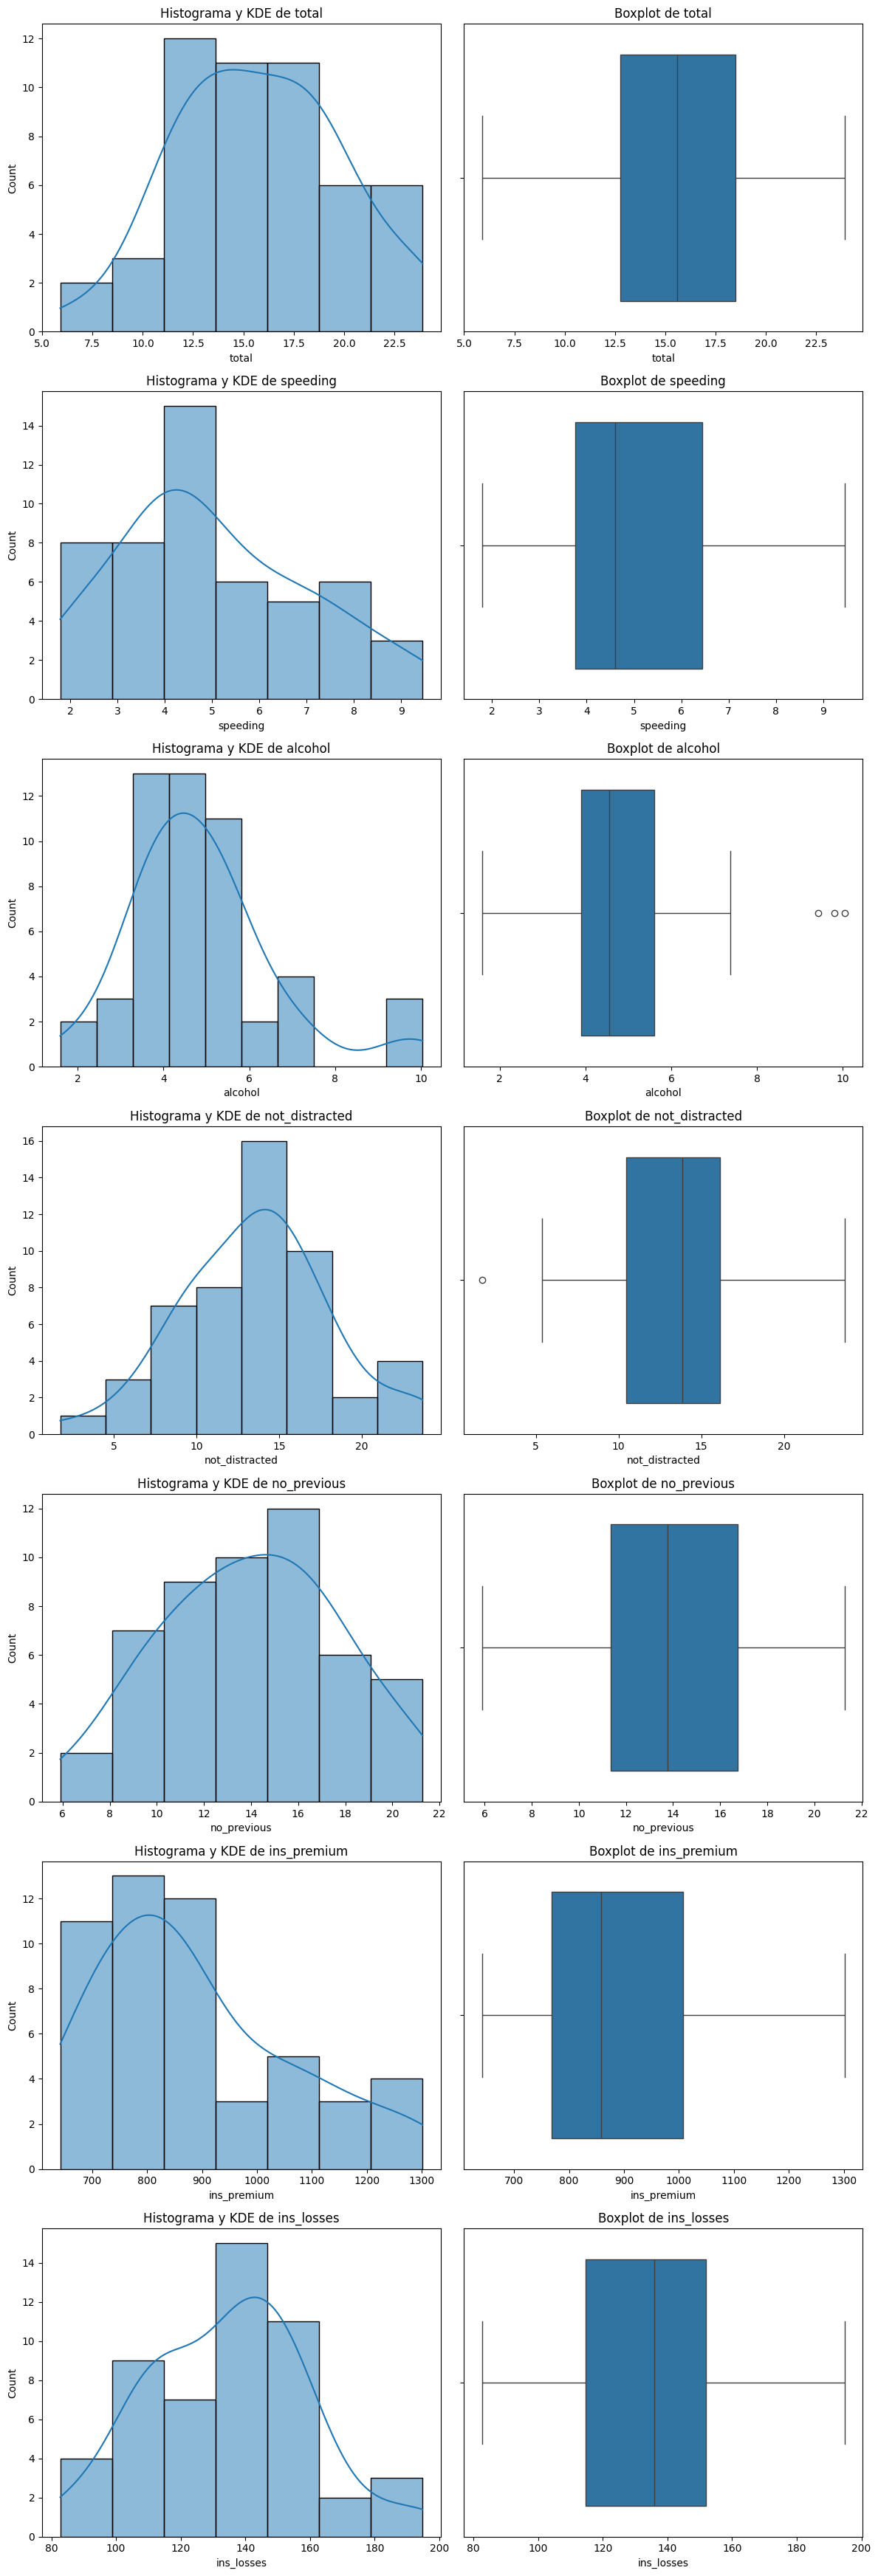

In [35]:
plot_combined_graphs(df_car,variables_numericas_car)

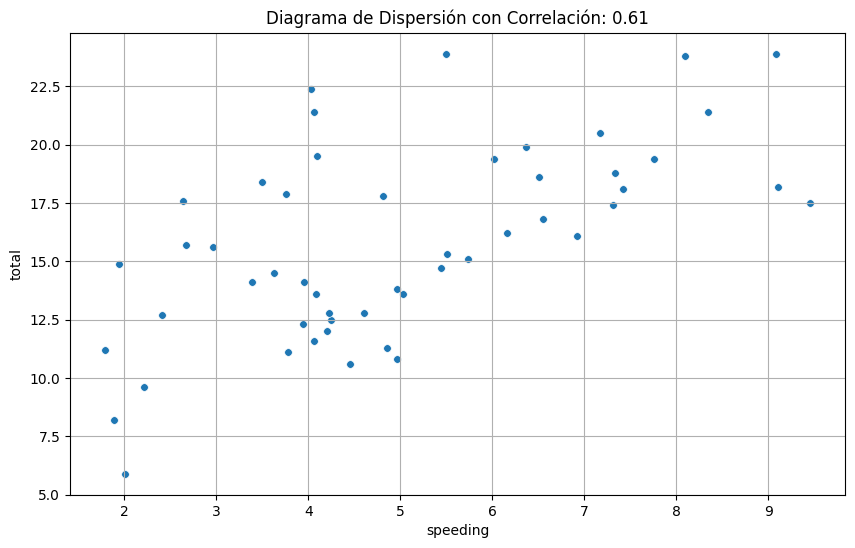

In [36]:
grafico_dispersion_con_correlacion(df_car,"speeding", "total", mostrar_correlacion= True, tamano_puntos= 30)

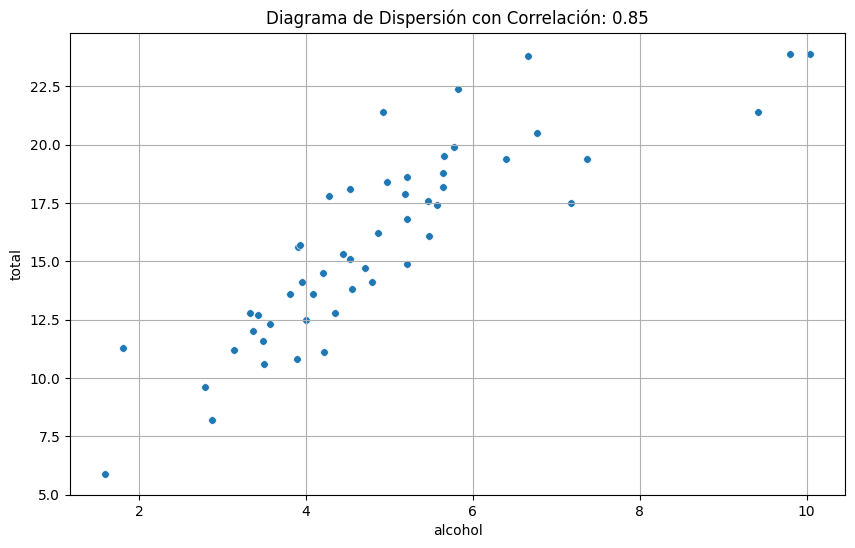

In [39]:
grafico_dispersion_con_correlacion(df_car,"alcohol", "total", mostrar_correlacion= True, tamano_puntos= 30)

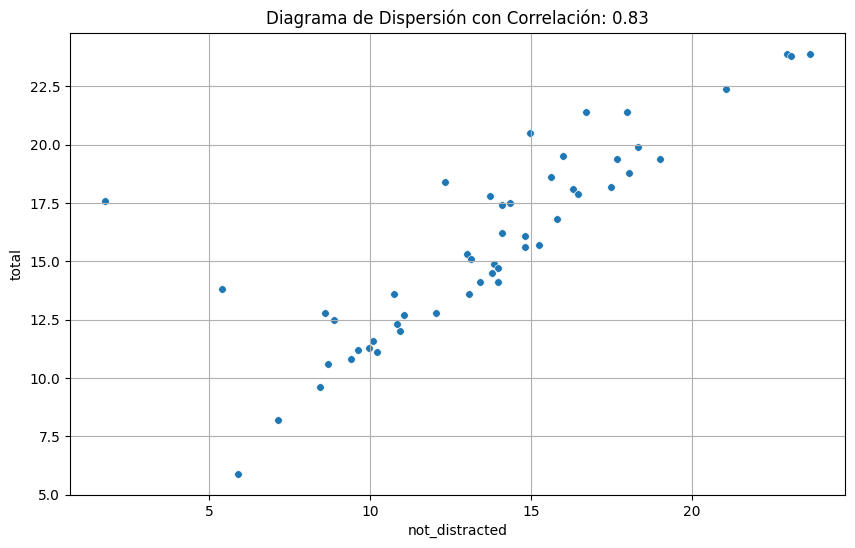

In [40]:
grafico_dispersion_con_correlacion(df_car,"not_distracted", "total", mostrar_correlacion= True, tamano_puntos= 30)

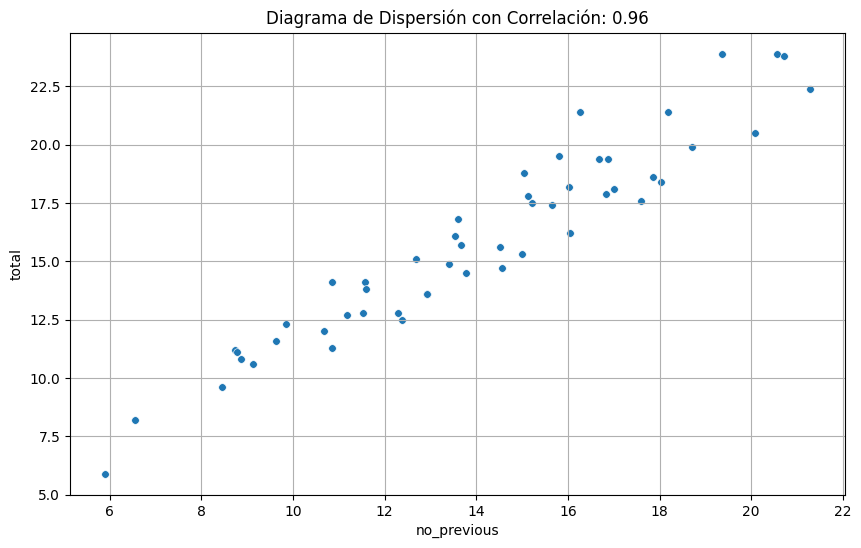

In [41]:
grafico_dispersion_con_correlacion(df_car,"no_previous", "total", mostrar_correlacion= True, tamano_puntos= 30)

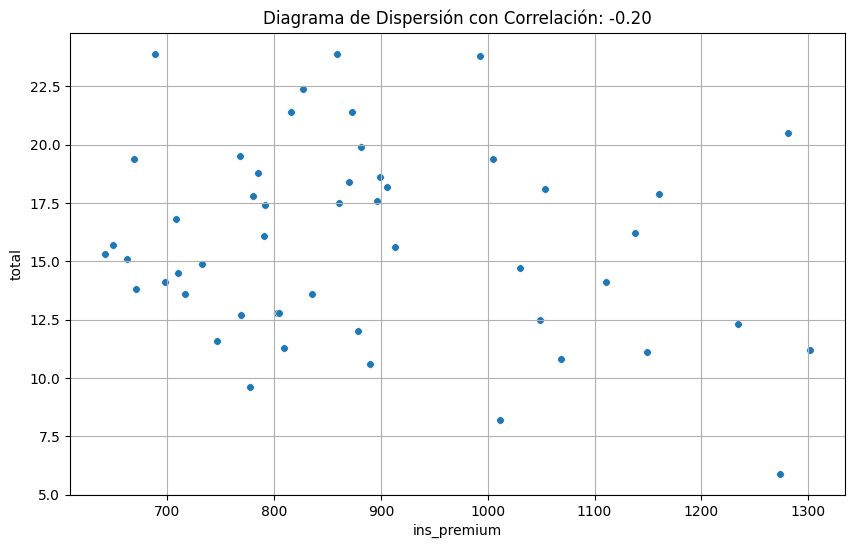

In [43]:
grafico_dispersion_con_correlacion(df_car,"ins_premium", "total", mostrar_correlacion= True, tamano_puntos= 30)

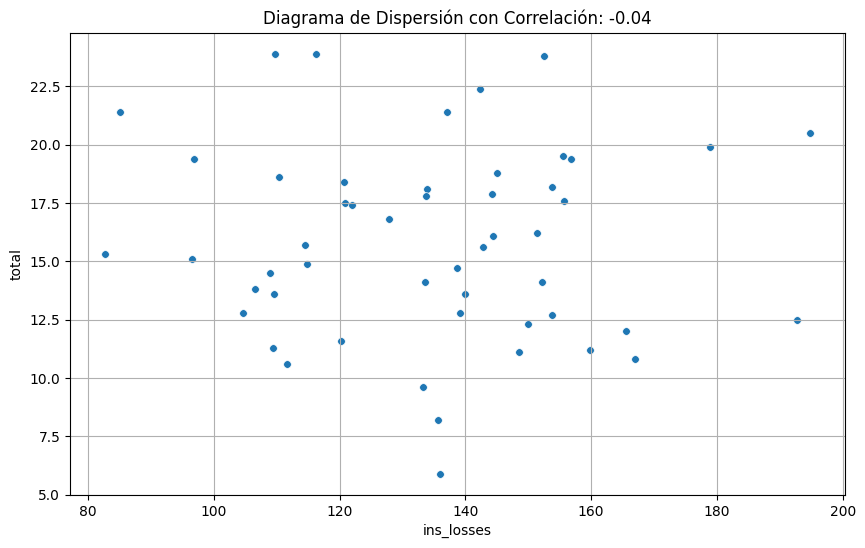

In [44]:
grafico_dispersion_con_correlacion(df_car,"ins_losses", "total", mostrar_correlacion= True, tamano_puntos= 30)

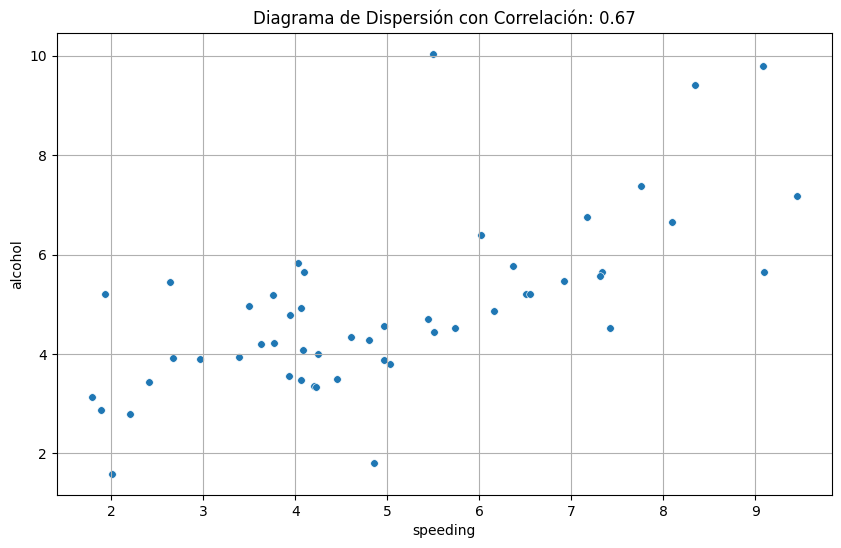

In [45]:
grafico_dispersion_con_correlacion(df_car,"speeding", "alcohol", mostrar_correlacion= True, tamano_puntos= 30)

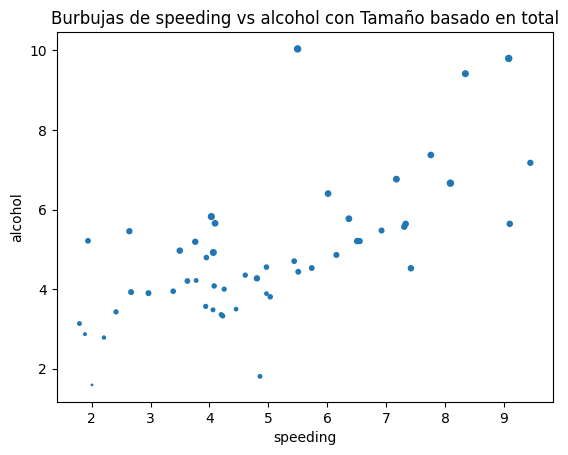

In [56]:
bubble_plot(df_car,"speeding","alcohol","total", scale = 1)

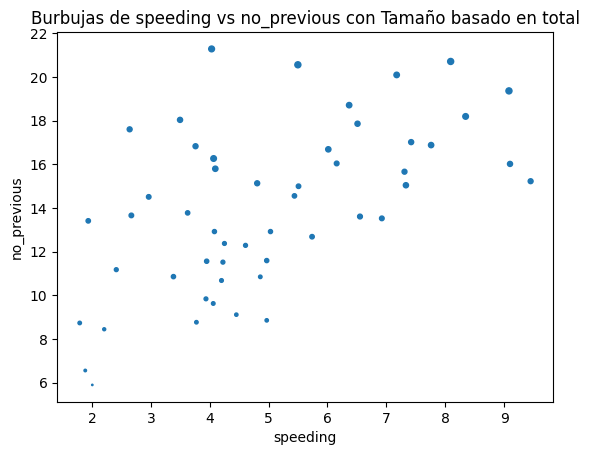

In [57]:
bubble_plot(df_car,"speeding","no_previous","total", scale = 1)

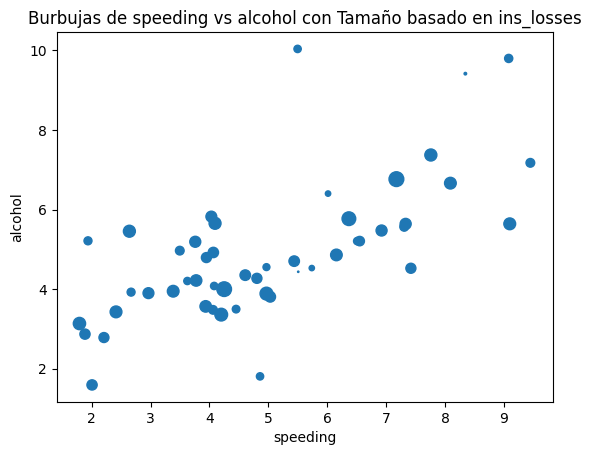

In [58]:
bubble_plot(df_car,"speeding","alcohol","ins_losses", scale = 1)

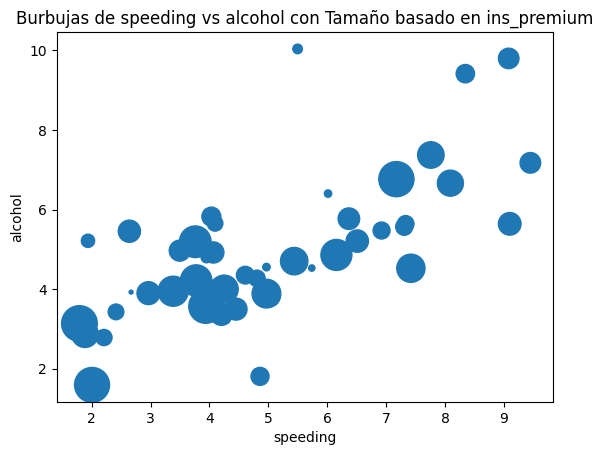

In [59]:
bubble_plot(df_car,"speeding","alcohol","ins_premium", scale = 1)

In [61]:
corr_matrix = df_car.corr(numeric_only= True) # Si no lo pones y tienes variables tipo texto, fallará7
corr_matrix

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


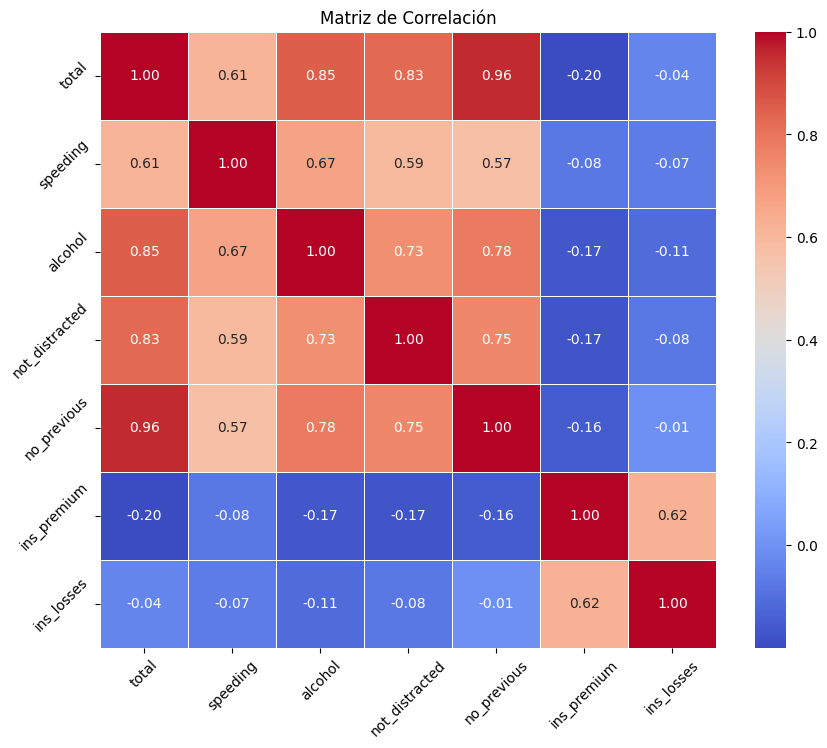

In [62]:
plt.figure(figsize=(10, 8))  # Ya lo veremos pero esto permite ajustar el tamaño de las gráficas
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar=True, square=True, linewidths=.5) # el cmap es el rango de colores usado para representar "el calor"

plt.title('Matriz de Correlación')
plt.xticks(rotation=45)  # Rota las etiquetas de las x si es necesario
plt.yticks(rotation=45)  # Rota las etiquetas de las y si es necesario

plt.show()

In [ ]:
# Se hacen las burbujas mas grandes con perdidas de seguro/planes de seguro por alcohol y exceso de velocidad
# La correlacion es muy significativa. Se nutren mutuamente. No sabemos si hay causalidad pero si una correlacion muy alta 
# Las compañías de seguro cobran más a los conductores que tienen problemas de alcohol y exceso de velocidad ya que las perdidas son  mayores
# Lo podemos ver en la matriz de correlacion donde todas estas variables estan altamente correlacionadas entre si.
# Los que pagan mas por el seguro son los que tienen mas perdidas y estos son los que tienen problemas de alcohol y exceso de velocidad.

In [27]:
variables_numericas_car = list(df_car.describe())

In [38]:
variables_numericas_car

['total',
 'speeding',
 'alcohol',
 'not_distracted',
 'no_previous',
 'ins_premium',
 'ins_losses']

### Ejercicio 6

Realiza un análisis multivariante entre las variables numéricas "total", "alcohol", "speeding". ¿Puedes sacar alguna conclusión interesante?

In [ ]:
# ^ ya completado